<a href="https://colab.research.google.com/github/erica00j/machinelearning/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

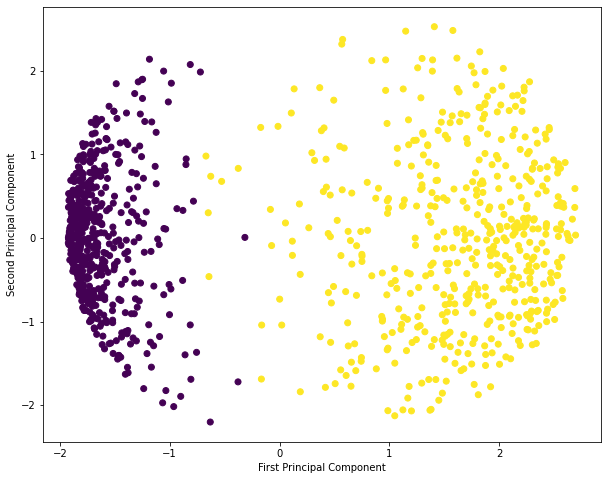

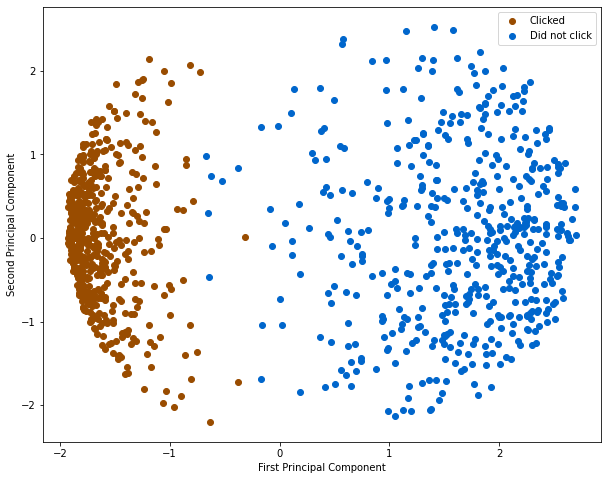

In [5]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

df = pd.read_csv('/content/advertising.csv')

df.head()

#data scrubbing
del df['Ad Topic Line'] #문자
del df['Country'] #문자
del df['City'] #문자
del df['Timestamp'] #사용할 수 없는 숫자형
del df['Male'] #discrete data

#표준화
scaler = StandardScaler() 
scaler.fit(df) 
scaled_data = scaler.transform(df)

pca = PCA(n_components=2)
pca.fit(scaled_data) 
scaled_pca = pca.transform(scaled_data)

#Query the number of rows and columns in the scaled dataframe 
scaled_data.shape
scaled_pca.shape

# State the size of the plot
plt.figure(figsize=(10,8))

#Configure the scatterplot's x and y axes as principal components 1 and 2, and color-coded by the variable Clicked on Ad.
plt.scatter(scaled_pca[:, 0], scaled_pca[:,1], c=df['Clicked on Ad'])

#State the scatterplot labels
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.figure(figsize=(10,8))
legend = df['Clicked on Ad']

#Add brown and blue RGB colors
colors = {0: '#994c00', 1: '#0066cc'}
labels = {0: 'Clicked', 1: 'Did not click'}

# Use a for-loop to set color for each data point
for t in np.unique(legend):
    ix = np.where(legend == t)
    plt.scatter(scaled_pca[ix,0], scaled_pca[ix,1], c=colors[t], label=labels[t])
    
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()
